<h1 align="center">MSIN0114: Business Analytics Consulting Project</h1>
<h2 align="center">S2R Analytics</h2>

# Table of Contents

**Predictive analytics (ML pipeline)**

* [Part 3](#part3): Exploratory data analysis
<br />
<br />
* [Part 4](#part4): Preprocessing
    * [4.1](#4_1): Outliers
    * [4.2](#4_2): Missing values
    * [4.3](#4_3): Encoding
    * [4.4](#4_4): Scaling
    * [4.5](#4_5): Splitting
<br />
<br />
* [Part 5](#part5): Model training
* [Part 6](#part6): Performance evaluation
* [Part 7](#part7): Feature importance and statistical tests
* [Part 8](#part8): Converting the output
* [Part 9](#part9): Pipeline creation

## Notebook Setup

In [1]:
#Essentials
import pandas as pd
from pandas import Series, DataFrame
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
import numpy as np; np.random.seed(2022)
import random
import sqlite3
import pyodbc

#Image creation and display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go
#from image import image, display

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.base import clone
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier

#Other
import itertools as it
import io
import os
os.sys.path
import sys
import glob
import concurrent.futures
from __future__ import print_function
import binascii
import struct
from PIL import Image
import scipy
import scipy.misc
import scipy.cluster
import datetime, time
import functools, operator
from datetime import datetime

In [7]:
df = pd.read_csv('flat.csv')
df.describe()

c:\Users\MarfaPopova\S2R Analytics\Development & Support Team - Power BI for Synergy - Advanced Analytics\DataFlowExtract\venv\lib\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (6,7,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Project_ID,Project_Size_Sort_Order,Total_Num_Stages,Perc_of_Stages_with_Fixed_Fee,Project_Manager,Employment_Total_Months,Perc_of_Subcontractors,Project_Duration_Weeks,Total_Data_Issues,Client_ID,Client_Projects_Total_No,Client_Duration_Months,Stage_ID,Stage_Duration_Weeks,Recoverability,Profit_Measure
count,5.059350e+05,505934.000000,468061.000000,468061.000000,5.002410e+05,500241.000000,505088.000000,499957.000000,505932.000000,1.520040e+05,152004.000000,152004.000000,5.002040e+05,500204.000000,488242.000000,479475.000000
mean,5.647774e+05,6.240108,21.362560,72.484925,7.686244e+06,135.674021,0.029376,109.890273,13.810490,8.111726e+06,4.923055,65.598892,2.710968e+06,38.356587,1.646284,1.148097
std,2.682577e+05,1.871434,23.261015,27.357930,3.089861e+05,99.065004,0.183591,91.858582,18.054033,7.926905e+05,10.214084,51.908373,1.313294e+06,105.084383,0.345200,0.858805
min,3.677040e+05,1.000000,1.000000,1.920000,7.612683e+06,-4.000000,0.000000,0.000000,0.000000,7.613244e+06,1.000000,1.000000,1.388262e+06,-4697.000000,0.677418,0.000000
25%,3.719740e+05,5.000000,6.000000,57.140000,7.612773e+06,57.000000,0.000000,46.000000,4.000000,7.616861e+06,1.000000,19.000000,1.426588e+06,4.000000,1.389992,0.360029
50%,3.763890e+05,7.000000,13.000000,80.000000,7.612882e+06,117.000000,0.000000,91.000000,9.000000,7.622639e+06,2.000000,49.000000,2.315372e+06,27.000000,1.615248,1.245257
75%,7.263650e+05,8.000000,29.000000,96.240000,7.613028e+06,190.000000,0.000000,136.000000,17.000000,8.698505e+06,3.000000,116.000000,3.706600e+06,56.000000,1.877431,1.688814
max,1.567895e+06,8.000000,133.000000,100.000000,1.009472e+07,436.000000,50.000000,584.000000,143.000000,1.031480e+07,195.000000,149.000000,6.014965e+06,494.000000,2.651113,4.264392


## Part 3: <a class="anchor" id="part3"></a> Preprocessing

### 3.1 <a class="anchor" id="3_1"></a> Outliers

<AxesSubplot:>

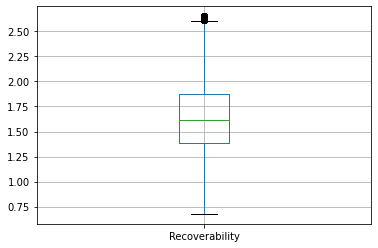

In [8]:
for x in ['Recoverability']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan

    df.loc[df[x] > max,x] = np.nan

df.boxplot('Recoverability')

<AxesSubplot:>

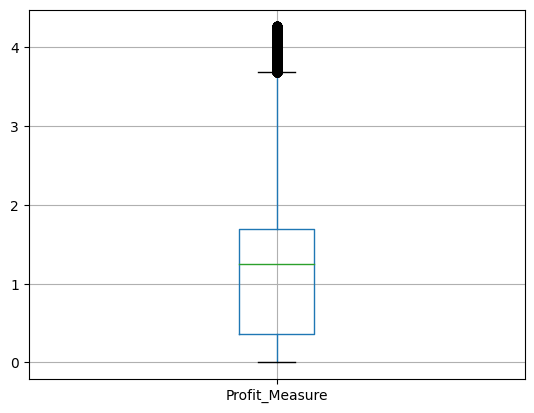

In [9]:
for x in ['Profit_Measure']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan

    df.loc[df[x] > max,x] = np.nan

df.boxplot('Profit_Measure')

Interpretation: https://www.mathbootcamps.com/how-to-read-a-boxplot/

### 3.2 <a class="anchor" id="3_2"></a> Missing values

In [22]:
df

,Project_ID,Country,Office,Sector,Project_Size_Sort_Order,Total_Num_Stages,Is_Multi_Discipline_Project,Is_First_Client_Project,Default_Rate_Group,Perc_of_Stages_with_Fixed_Fee,Project_Director,Project_Manager,Synergy_Team,Employment_Total_Months,Manager_Is_Recent,Perc_of_Subcontractors,Project_Duration_Weeks,Is_Front_Loaded,Delivered_on_Time,Fully_In_Lockdown,Partially_In_Lockdown,Suffered_Data_Loss,Total_Data_Issues,Client_ID,Client_Projects_Total_No,Client_Is_Repeated,Client_Duration_Months,Client_Is_Recent,Stage_ID,Stage_Discipline,Stage_Duration_Weeks,Recoverability,Profit_Measure
0,367704.0,Australia,Whyalla,Ports & Marine,4.0,1.0,False,True,Standard,100.0,Mark Gilbert,7612852.0,SA - Industrial,117.0,False,0.0,4.0,True,NaN,False,False,False,2.0,7615441.0,6.0,True,146.0,False,1388262.0,Design,0.0,2.424242,0.000000
1,367704.0,Australia,Whyalla,Ports & Marine,4.0,1.0,False,True,Standard,100.0,Mark Gilbert,7612852.0,SA - Industrial,117.0,False,0.0,4.0,True,NaN,False,False,False,2.0,7615441.0,6.0,True,146.0,False,1388262.0,Design,0.0,2.424242,0.000000
2,367704.0,Australia,Whyalla,Ports & Marine,4.0,1.0,False,True,Standard,100.0,Mark Gilbert,7612852.0,SA - Industrial,117.0,False,0.0,4.0,True,NaN,False,False,False,2.0,7615441.0,6.0,True,146.0,False,1388262.0,Design,0.0,2.424242,0.000000
3,367704.0,Australia,Whyalla,Ports & Marine,4.0,1.0,False,True,Standard,100.0,Mark Gilbert,7612852.0,SA - Industrial,117.0,False,0.0,4.0,True,NaN,False,False,False,2.0,7615441.0,6.0,True,146.0,False,1388262.0,Design,0.0,1.843658,1.284239
4,367704.0,Australia,Whyalla,Ports & Marine,4.0,1.0,False,True,Standard,100.0,Mark Gilbert,7612852.0,SA - Industrial,117.0,False,0.0,4.0,True,NaN,False,False,False,2.0,7615441.0,6.0,True,146.0,False,1388262.0,Design,0.0,1.728429,1.203816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505930,1529864.0,Australia,WGAWA Pty Ltd,Civic & Education Buildings,1.0,2.0,False,False,WA Chargeout Rates from 1st July 2021,50.0,James Davidson,7809410.0,WA - Civil,20.0,False,NaN,1.0,NaN,NaN,False,False,False,1.0,NaN,NaN,NaN,NaN,NaN,5998563.0,* NOT SET,5.0,NaN,NaN
505931,1529864.0,Australia,WGAWA Pty Ltd,Civic & Education Buildings,1.0,2.0,False,False,WA Chargeout Rates from 1st July 2021,50.0,James Davidson,7809410.0,WA - Civil,20.0,False,NaN,1.0,NaN,NaN,False,False,False,1.0,NaN,NaN,NaN,NaN,NaN,5998564.0,* NOT SET,5.0,NaN,NaN
505932,1538446.0,Australia,WGAVIC Pty Ltd,Energy,1.0,1.0,False,False,Vic chargeout FY22,100.0,Cameron Jackson (MPD),7612860.0,VIC - Buildings,171.0,False,NaN,3.0,NaN,True,False,False,False,0.0,NaN,NaN,NaN,NaN,NaN,6009400.0,* NOT SET,15.0,NaN,NaN
505933,1538447.0,Australia,WGAVIC Pty Ltd,Energy,1.0,1.0,False,False,Vic chargeout FY22,100.0,Cameron Jackson (MPD),7612860.0,VIC - Buildings,171.0,False,NaN,4.0,NaN,True,False,False,False,1.0,NaN,NaN,NaN,NaN,NaN,6009401.0,* NOT SET,16.0,NaN,NaN


In [31]:
stage_lvl = pd.DataFrame(df.groupby(['Project_ID', 'Stage_ID'])['Recoverability', 'Profit_Measure'].sum()).reset_index()
stage_lvl

C:\Users\MarfaPopova\AppData\Local\Temp\ipykernel_14612\2231829664.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped = pd.DataFrame(df.groupby(['Project_ID', 'Stage_ID'])['Recoverability', 'Profit_Measure'].sum()).reset_index()


,Project_ID,Stage_ID,Recoverability,Profit_Measure
0,367704.0,1388262.0,70.089817,57.019199
1,367711.0,1388295.0,16.655101,16.655101
2,367711.0,1388296.0,60.293234,24.276015
3,367711.0,2096626.0,12.451831,12.451831
4,367711.0,4063518.0,6.338760,7.362404
...,...,...,...,...
21408,1524776.0,6014965.0,0.000000,0.000000
21409,1529864.0,5998563.0,0.000000,0.000000
21410,1529864.0,5998564.0,0.000000,0.000000
21411,1538446.0,6009400.0,0.000000,0.000000


In [32]:
project_lvl = pd.DataFrame(df.groupby(['Project_ID'])['Recoverability', 'Profit_Measure'].sum()).reset_index()
project_lvl

C:\Users\MarfaPopova\AppData\Local\Temp\ipykernel_14612\2321089568.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  project_lvl = pd.DataFrame(df.groupby(['Project_ID'])['Recoverability', 'Profit_Measure'].sum()).reset_index()


,Project_ID,Recoverability,Profit_Measure
0,367704.0,70.089817,57.019199
1,367705.0,0.000000,0.000000
2,367706.0,0.000000,0.000000
3,367707.0,0.000000,0.000000
4,367708.0,0.000000,0.000000
...,...,...,...
9750,1524776.0,0.000000,0.000000
9751,1529864.0,0.000000,0.000000
9752,1538446.0,0.000000,0.000000
9753,1538447.0,0.000000,0.000000


In [29]:
df_grouped['Recoverability'].value_counts()

0.000000       5995
4.607823         25
6.143764         21
7.679705         14
10.751587        11
               ... 
11.111749         1
1992.148048       1
59.705823         1
568.378120        1
1.439539          1
Name: Recoverability, Length: 3555, dtype: int64

In [30]:
df_grouped['Profit_Measure'].value_counts()

0.000000       6267
2.702815          4
4.607823          4
4.151100          3
4.710219          3
               ... 
46.497626         1
2081.157165       1
60.910573         1
1046.129354       1
2.423949          1
Name: Profit_Measure, Length: 3451, dtype: int64

In [18]:
# Number of columns having null values in the old dataset
cols = df.columns[df.isnull().any()].to_list()

for c in cols:
    print(c, df[c].isnull().sum())

Country 12731
Project_Size_Sort_Order 1
Total_Num_Stages 37874
Is_Multi_Discipline_Project 1
Is_First_Client_Project 1
Perc_of_Stages_with_Fixed_Fee 37874
Project_Director 1
Project_Manager 5694
Synergy_Team 5694
Employment_Total_Months 5694
Manager_Is_Recent 11048
Perc_of_Subcontractors 847
Project_Duration_Weeks 5978
Is_Front_Loaded 512
Delivered_on_Time 324536
Suffered_Data_Loss 5719
Total_Data_Issues 3
Client_ID 353931
Client_Projects_Total_No 353931
Client_Is_Repeated 353931
Client_Duration_Months 353931
Client_Is_Recent 353931
Stage_ID 5731
Stage_Discipline 5731
Stage_Duration_Weeks 5731
Recoverability 17693
Profit_Measure 26460


### 3.3 <a class="anchor" id="3_3"></a> Feature engineering

### 3.3 <a class="anchor" id="3_3"></a> Encoding

### 3.4 <a class="anchor" id="3_4"></a> Scaling

### 3.5 <a class="anchor" id="3_5"></a> Splitting

## Part 4: <a class="anchor" id="part4"></a> Exploratory data analysis